# Exploratory Data Analysis (EDA)
## Анализ датасета химических дескрипторов
## Беззубова Елизавета Владимировна, A4140

## Цели анализа:
- изучить структуру данных
- проверить их полноту и целостность 
- оценить выбросы
- выявить взаимосвязи

### Хранилище данных:
https://drive.google.com/file/d/1lIOnHOtzCNSoXV8akytUimq2RfNTC7PU/view?usp=sharing




## Чтение датасета из хранилища

In [4]:
import pandas as pd
from pathlib import Path

FILE_ID = "1lIOnHOtzCNSoXV8akytUimq2RfNTC7PU"
file_url = f"https://drive.google.com/uc?export=download&id={FILE_ID}"

try:
    print("Чтение данных из CSV файла...")
    raw_data = pd.read_csv(file_url, na_values=["#NUM!"])

# Проверка результата
    print(raw_data.shape)
    print("Первые 10 строк:")
    print(raw_data.head(10))

except Exception as e:
    print("Ошибка при чтении файла:", e)

Чтение данных из CSV файла...
(15166, 34)
Первые 10 строк:
   index row ID                                           Molecule  \
0      0   Row0                                                  N   
1      1   Row1                            O=C(O)c1c(OC(=O)C)cccc1   
2      2   Row2                                                C#C   
3      3   Row3  P(=O)(OP(=O)(OC[C@H]1O[C@@H](n2c3ncnc(c3nc2)N)...   
4      4   Row4  S1C([C@H](C(=O)O)N2[C@H]1[C@H](NC(=O)[C@H](N)c...   
5      5   Row5                    O=C1O[C@H]([C@@H](O)CO)C(=C1O)O   
6      6   Row6                        O=C1OC([C@@H](O)CO)C(=C1O)O   
7      7   Row7                                     NC(Cc1ccccc1)C   
8      8   Row8     O=C(OC)[C@@H](NC(=O)[C@@H](N)CC(=O)O)Cc1ccccc1   
9      9   Row9  S1C([C@H](C(=O)O)N2[C@H]1[C@H](NC(=O)[C@H](N)c...   

   Molecule name  Mannhold LogP  Atomic Polarizabilities  \
0            H3N           1.35                 3.100379   
1         C9H8O4           2.01                24.

## Проверка структуры данных

In [5]:
# Размер таблицы
print(raw_data.shape)

# Типы данных
df = pd.DataFrame(raw_data)
print("\nТипы ДО приведения:")
print(df.dtypes)

(15166, 34)

Типы ДО приведения:
index                                       int64
row ID                                     object
Molecule                                   object
Molecule name                              object
Mannhold LogP                             float64
Atomic Polarizabilities                   float64
Aromatic Atoms Count                        int64
Aromatic Bonds Count                        int64
Element Count                               int64
Bond Polarizabilities                     float64
Bond Count                                  int64
Eccentric Connectivity Index              float64
Fragment Complexity                       float64
VABC Volume Descriptor                    float64
Hydrogen Bond Acceptors                     int64
Hydrogen Bond Donors                        int64
Largest Chain                               int64
Largest Pi Chain                            int64
Petitjean Number                          float64
Rotatable Bonds C

### Вывод
    Типы данных определились неверно. Требуется приведение типов. 

In [5]:
# Приведение типов данных

# Текстовые данные
text_cols = ["row ID", "Molecule", "Molecule name", "Molecular Formula"]
for col in text_cols:
    df[col] = df[col].astype(str)

# Числовые данные
numeric_cols = [col for col in df.columns if col not in text_cols]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").astype("float64")

print("\nТипы ПОСЛЕ приведения:")
print(df.dtypes)


Типы ПОСЛЕ приведения:
index                                     float64
row ID                                     object
Molecule                                   object
Molecule name                              object
Mannhold LogP                             float64
Atomic Polarizabilities                   float64
Aromatic Atoms Count                      float64
Aromatic Bonds Count                      float64
Element Count                             float64
Bond Polarizabilities                     float64
Bond Count                                float64
Eccentric Connectivity Index              float64
Fragment Complexity                       float64
VABC Volume Descriptor                    float64
Hydrogen Bond Acceptors                   float64
Hydrogen Bond Donors                      float64
Largest Chain                             float64
Largest Pi Chain                          float64
Petitjean Number                          float64
Rotatable Bonds Count     

## Проверка полноты и целостности данных

In [6]:
# Количество записей
total = len(df)
print(f"Всего записей: {total}")

# Количество пропусков
print("Количество пропусков по столбцам:\n") 
print(df.isna().sum())

# Доля пропусков
print("\nДоля пропусков (%):\n")
print((df.isna().mean() * 100).round(2))

# Количество дубликатов
duplicates = df.duplicated().sum() 
print(f"\nКоличество дубликатов: {duplicates}")

# Уникальность молекул
if 'Molecule' in df.columns:
    unique_molecule = df['Molecule'].nunique()
    print("Количество уникальных молекул:", unique_molecule)
    print("Повторяющихся записей молекул:", total - unique_molecule)
    print(f"Доля уникальности (%): {unique_molecule / total * 100:.2f}%")

Всего записей: 15166
Количество пропусков по столбцам:

index                                        0
row ID                                       0
Molecule                                     0
Molecule name                                0
Mannhold LogP                                0
Atomic Polarizabilities                      3
Aromatic Atoms Count                         0
Aromatic Bonds Count                         0
Element Count                                0
Bond Polarizabilities                        3
Bond Count                                   0
Eccentric Connectivity Index                 0
Fragment Complexity                          0
VABC Volume Descriptor                    1559
Hydrogen Bond Acceptors                      0
Hydrogen Bond Donors                         0
Largest Chain                                0
Largest Pi Chain                             0
Petitjean Number                             0
Rotatable Bonds Count                        0
Lipi

### Вывод
    В датасете отсутствуют дубликаты строк, однако повтояющиеся записей молекул 69. Это снова говорит нам о проблеме идетификации молекул по SMILES. Объективно у них разная структура, так как разне значения дескрипторов, однако формат записи структуры SMILES не может полностью это отразить, из-за чего молекулы считываются как одинаковые.
    Также можно заметить, что наибольшее количество пропусков в столбце VABS Volume Descriptor (Volume-weighted Average Bond Surface Descriptor), что говорит о том, что данных об этой характеристике недостаточно. Она используется для построения моделей молекул и может быть крайне полезна для этого активно развивающегося направления.

## Оценка выбросов

,index,Mannhold LogP,Atomic Polarizabilities,Aromatic Atoms Count,Aromatic Bonds Count,Element Count,Bond Polarizabilities,Bond Count,Eccentric Connectivity Index,Fragment Complexity,...,Molecular Weight,XLogP,Zagreb Index,Formal Charge,Formal Charge (pos),Formal Charge (neg),Heavy Atoms Count,Molar Mass,SP3 Character,Rotatable Bonds Count (non terminal)
count,15166.000000,15166.000000,15163.000000,15166.000000,15166.000000,15166.000000,15163.000000,15166.000000,1.516600e+04,1.516600e+04,...,15163.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15135.000000,15166.000000,15166.000000
mean,7582.500000,2.489623,49.740166,6.645325,6.843532,41.623104,29.409959,22.741329,1.089732e+04,2.798695e+03,...,326.574023,2.399497,110.115785,-0.002308,0.250495,-0.252802,21.660359,326.871565,0.147718,4.736582
std,4378.191426,1.187376,46.949506,8.185700,8.547718,41.772484,31.984310,23.592569,3.398257e+08,1.844452e+04,...,312.689439,3.538269,116.877808,0.303287,0.883574,0.905883,21.711399,313.134293,0.100503,8.338553
min,0.000000,-4.810000,0.204956,0.000000,0.000000,1.000000,0.000000,0.000000,-2.129542e+09,0.000000e+00,...,1.007825,-34.188000,0.000000,-16.000000,0.000000,-19.000000,0.000000,1.007941,0.000000,0.000000
25%,3791.250000,1.680000,26.476000,0.000000,0.000000,21.000000,14.303277,11.000000,9.400000e+01,3.020400e+02,...,181.091406,0.550250,48.000000,0.000000,0.000000,0.000000,11.000000,181.209614,0.066667,1.000000
50%,7582.500000,2.450000,43.939481,6.000000,6.000000,36.000000,25.155312,21.000000,3.110000e+02,1.024050e+03,...,287.105862,2.286000,98.000000,0.000000,0.000000,0.000000,20.000000,287.293808,0.153846,3.000000
75%,11373.750000,3.220000,61.024618,12.000000,12.000000,53.000000,35.940624,29.000000,6.270000e+02,2.324015e+03,...,391.974547,3.952000,144.000000,0.000000,0.000000,0.000000,27.000000,392.302371,0.222222,6.000000
max,15165.000000,47.440000,1421.489217,228.000000,244.000000,1262.000000,1261.626783,769.000000,2.100654e+09,1.310691e+06,...,10300.588974,137.302000,3890.000000,8.000000,19.000000,0.000000,693.000000,10305.752873,1.000000,203.000000


Mannhold LogP: 194 выбросов по IQR
Atomic Polarizabilities: 587 выбросов по IQR
Aromatic Atoms Count: 123 выбросов по IQR
Aromatic Bonds Count: 162 выбросов по IQR
Element Count: 522 выбросов по IQR
Bond Polarizabilities: 670 выбросов по IQR
Bond Count: 506 выбросов по IQR
Eccentric Connectivity Index: 1916 выбросов по IQR
Fragment Complexity: 1055 выбросов по IQR
VABC Volume Descriptor: 592 выбросов по IQR
Hydrogen Bond Acceptors: 727 выбросов по IQR
Hydrogen Bond Donors: 999 выбросов по IQR
Largest Chain: 729 выбросов по IQR
Largest Pi Chain: 444 выбросов по IQR
Petitjean Number: 2735 выбросов по IQR
Rotatable Bonds Count: 800 выбросов по IQR
Lipinski's Rule of Five: 869 выбросов по IQR
Topological Polar Surface Area: 946 выбросов по IQR
Vertex adjacency information magnitude: 847 выбросов по IQR
Molecular Weight: 639 выбросов по IQR
XLogP: 668 выбросов по IQR
Zagreb Index: 460 выбросов по IQR
Formal Charge: 252 выбросов по IQR
Formal Charge (pos): 1922 выбросов по IQR
Formal Charge 

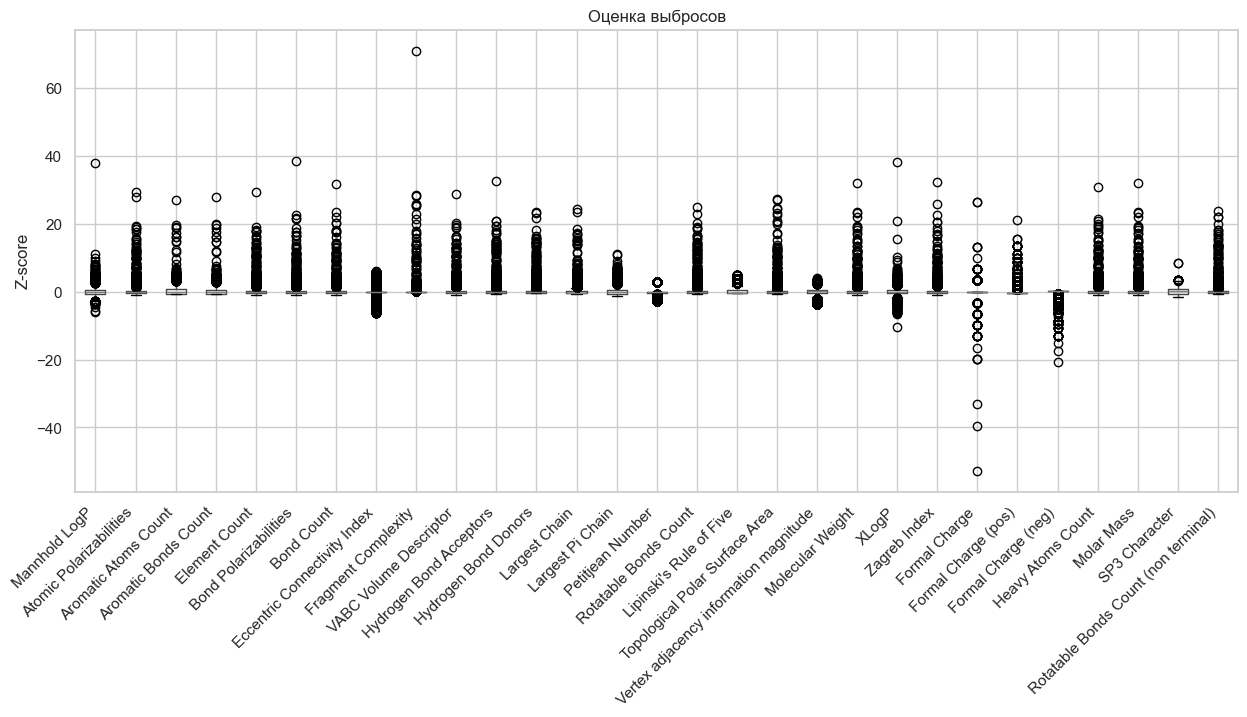

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Общая статистика
display(df.describe())

# Оценка выбросов
numeric_cols = df.select_dtypes(include=['number']).columns.drop('index', errors='ignore')

# Методом IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    df[f'{col}_is_outlier'] = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)
    n_outliers = df[f'{col}_is_outlier'].sum()
    
    print(f"{col}: {n_outliers} выбросов по IQR")

# Методом z-score
# Стандартизируем по колонкам
df_scaled = df[numeric_cols].apply(zscore, nan_policy='omit')

# Построение boxplot всех колонок на одном графике
plt.figure(figsize=(15, 6))
df_scaled.boxplot()
plt.title("Оценка выбросов")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Z-score")
plt.show()


### Вывод
    Можно наблюдать, что данные охватывают большой диапазон значений. Статистически значения ближе к среднему, что говорит о достаточно большом объеме данных для обработки и их достоверности. Заметно, что аномалии практически отсутствуют.


## Проверка взаимосвязей

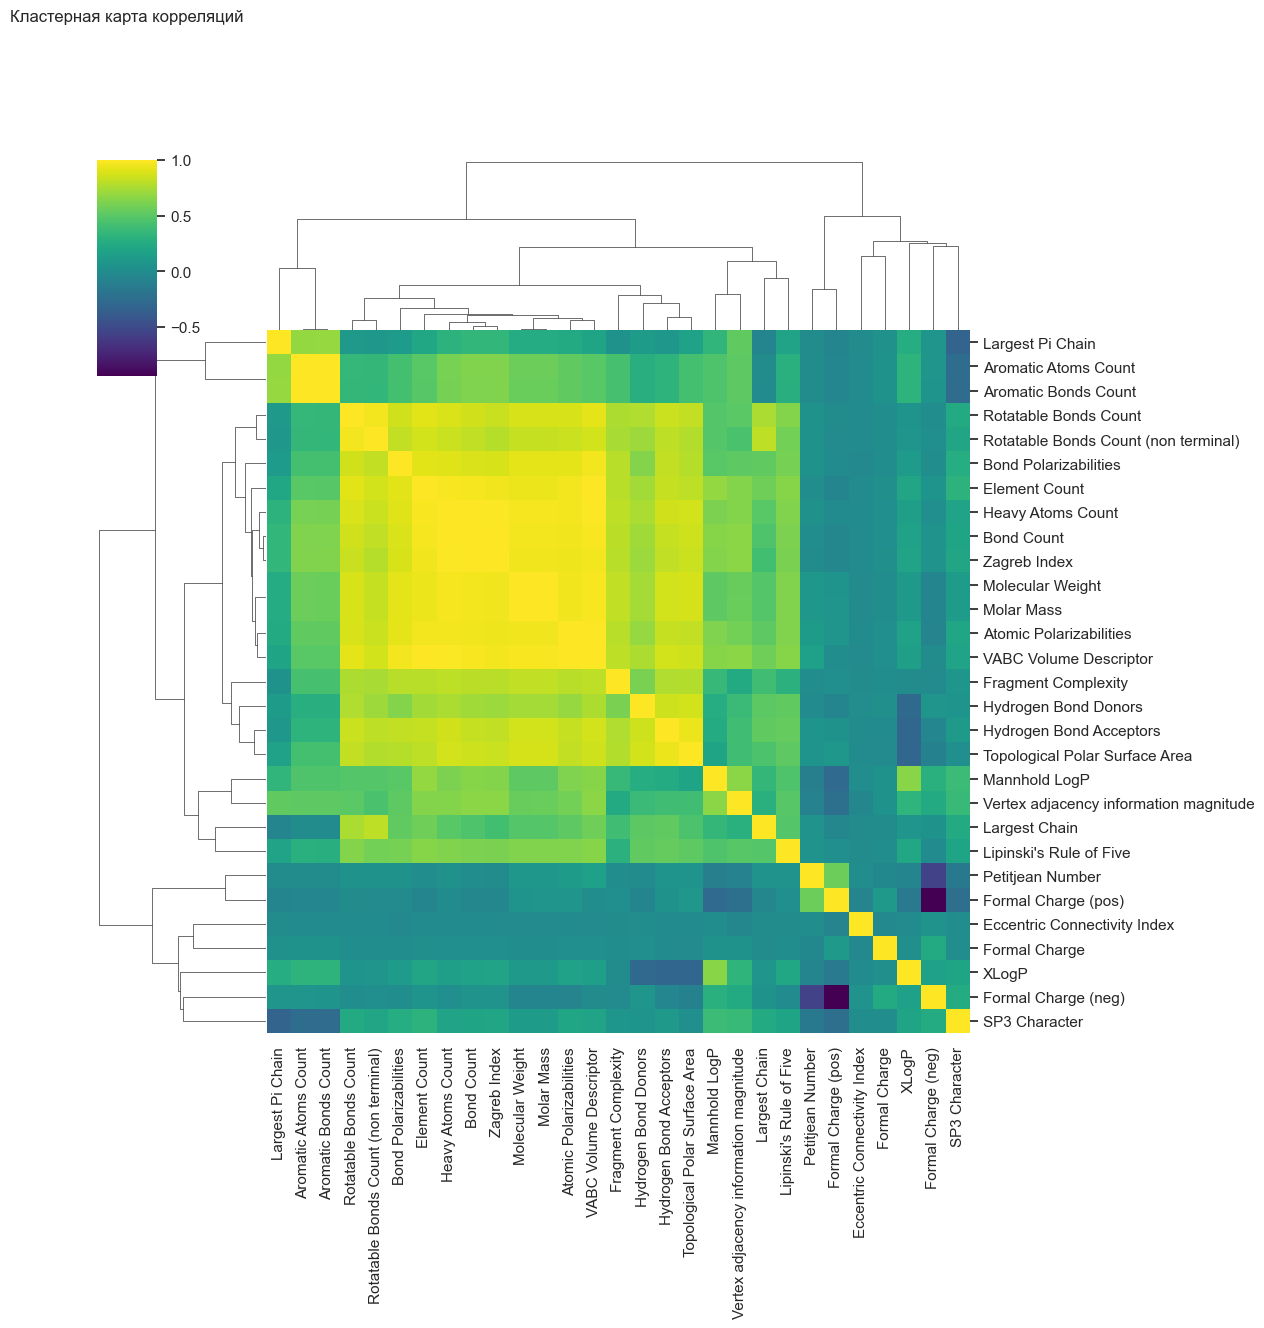

In [8]:
import seaborn as sns

# Установка единого стиля для всех графиков
sns.set_theme(style="whitegrid", palette="viridis")

# Проверка взаимосвязей между числовыми признаками (кластерная карта)
numeric_cols = df.select_dtypes(include='number').columns.drop('index', errors='ignore')
corr = df[numeric_cols].corr()

sns.clustermap(corr, cmap="viridis", figsize=(12,12))
plt.title("Кластерная карта корреляций", pad=100)
plt.show()

### Вывод
    На кластерной карте видно, что признаки группируются.
    Масса и атомные характеристики (Molecular Weight, Heavy Atoms Count, Molar Mass) сильно коррелируют между собой. Количество водородных акцепторов и доноров коррелирует с топологической площадью полярной поверхности. Ароматические атомы и связи формируют отдельную группу так же, как и характеристики описывающие гибкость молекул.

    На основе этих наблюдений построим более детальные графики для каждой группы признаков.

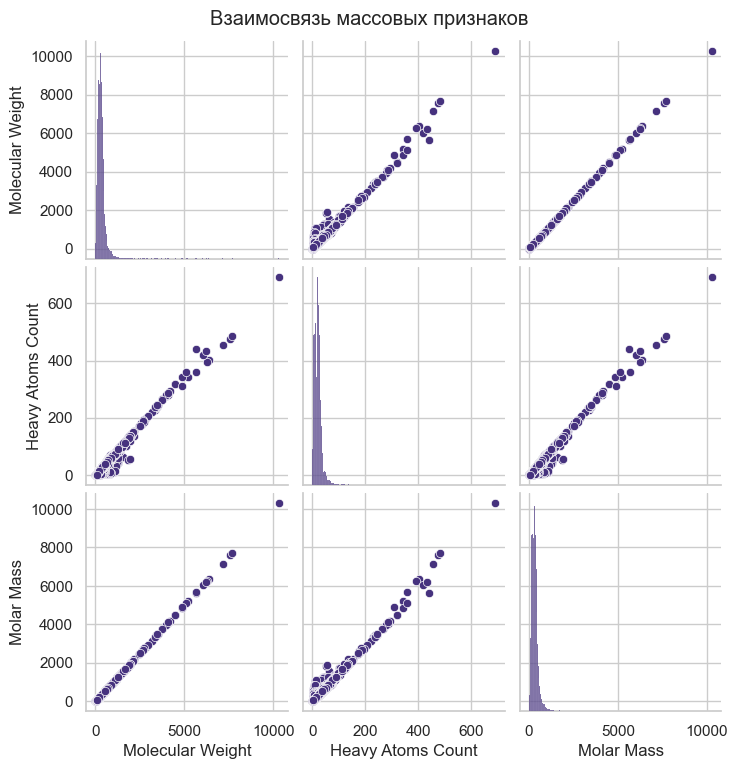

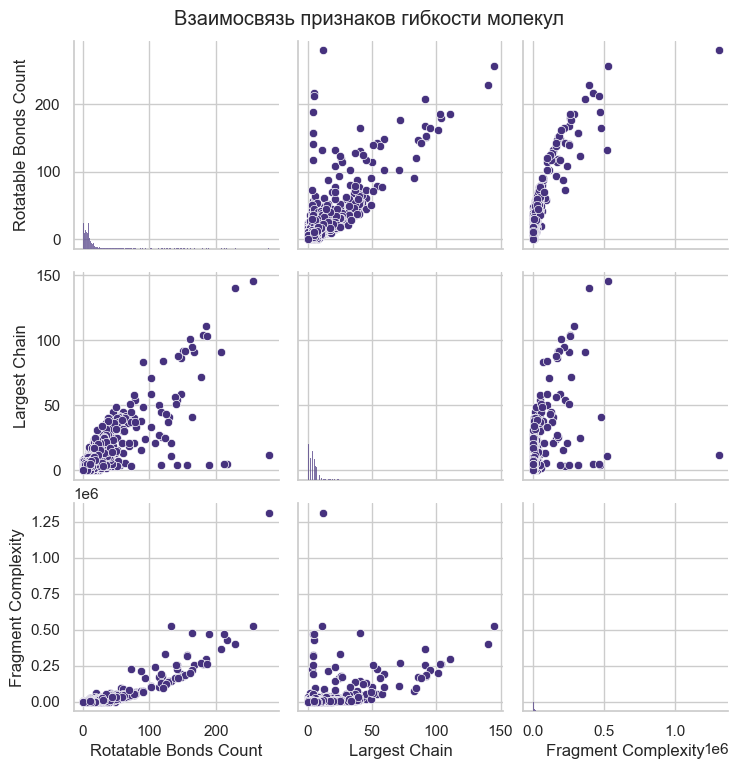

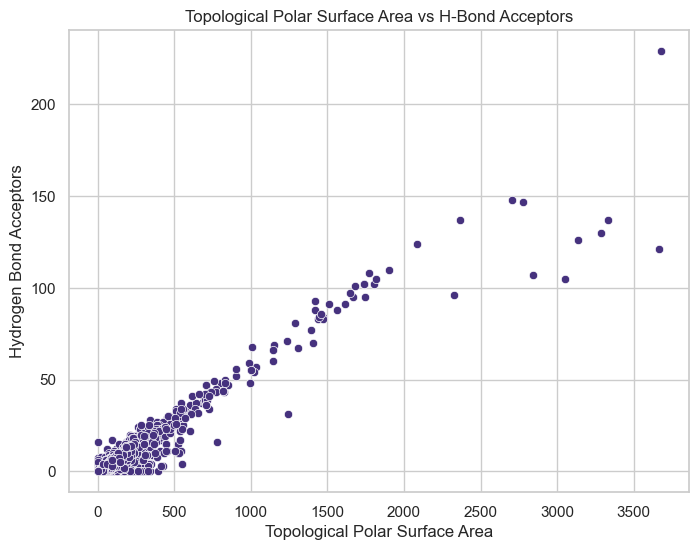

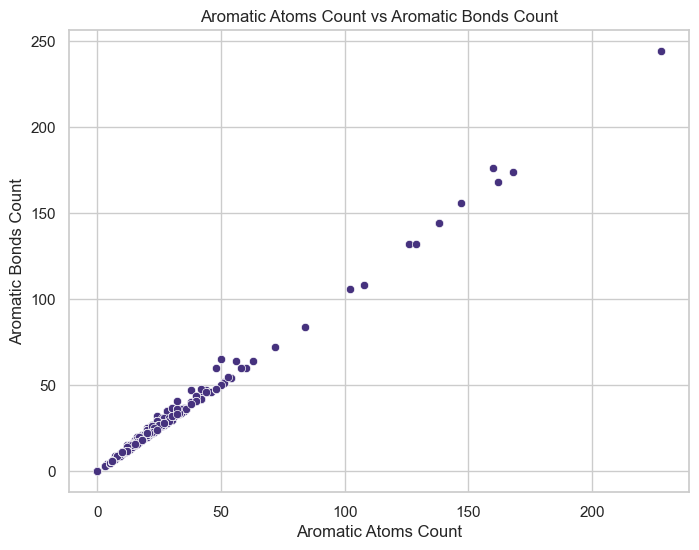

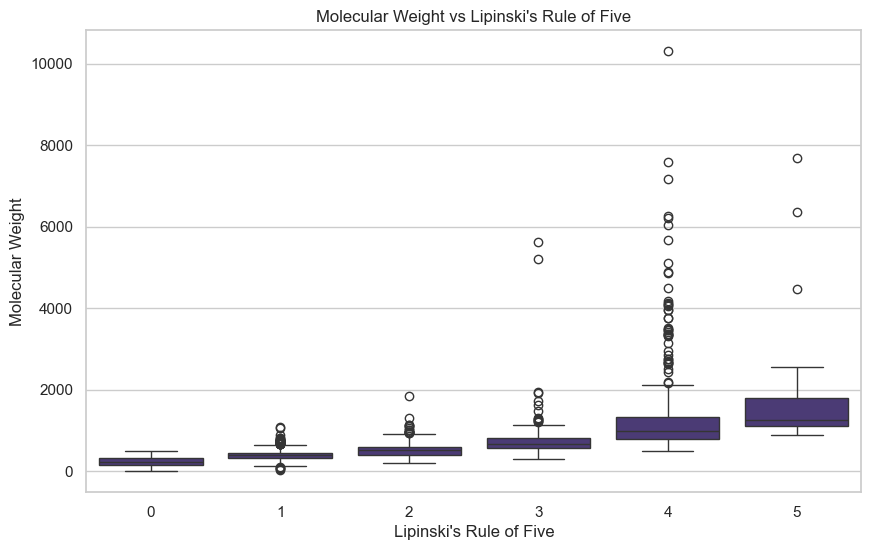

In [10]:
# Группы признаков
mass_features = ['Molecular Weight', 'Heavy Atoms Count', 'Molar Mass']
hbond_features = ['Topological Polar Surface Area', 'Hydrogen Bond Acceptors', 'Hydrogen Bond Donors']
aromatic_features = ['Aromatic Atoms Count', 'Aromatic Bonds Count']
rotatable_features = ['Rotatable Bonds Count', 'Largest Chain', 'Fragment Complexity']

# Графики по массовым признакам
sns.pairplot(df[mass_features])
plt.suptitle("Взаимосвязь массовых признаков", y=1.02)
plt.show()

# Графики по признакам гибкости молекулы
sns.pairplot(df[rotatable_features])
plt.suptitle("Взаимосвязь признаков гибкости молекул", y=1.02)
plt.show()

# Scatterplot сильных корреляций
plt.figure(figsize=(8,6))
sns.scatterplot(x='Topological Polar Surface Area', y='Hydrogen Bond Acceptors', data=df)
plt.title("Topological Polar Surface Area vs H-Bond Acceptors")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Aromatic Atoms Count', y='Aromatic Bonds Count', data=df)
plt.title("Aromatic Atoms Count vs Aromatic Bonds Count")
plt.show()

# Boxplot по правилам Липински
plt.figure(figsize=(10,6))
sns.boxplot(x="Lipinski's Rule of Five", y='Molecular Weight', data=df)
plt.title("Molecular Weight vs Lipinski's Rule of Five")
plt.show()

### Выводы

1. Графики подверждают, что масса и атомные характеристики (Molecular Weight, Heavy Atoms Count, Molar Mass) сильно коррелируют между собой, как и должно быть, что подтверждает достоверность датасета. 
2. Из графиков "Взаимосвязь признаков гибкости молекул" заметно, что чем сложнее и длинее молекула, тем она, вероятно, гибче. 
3. Молекулы с большим количеством водородных акцепторов имеют большую полярную поверхность, судя по графику "Topological Polar Surface Area vs H-Bond Acceptors", что абсолютно логично с точки зрения химии и ещё раз подтверждает достоверность датасета.  
4. Количество ароматических связей прямо связано с количеством ароматических атомов, т.к. кольца формируют атомные группы и связи одновременно, что вновь подтверждает достоверность. 
5. Молекулы, удовлетворяющие правилам Липински, как правило имеют меньшую массу, что соответствует теоретическим ограничениям для лекарственных соединений. Правила Липински - ограничения по ключевым молекулярным свойствам (включая молекулярную массу), которые делают соединение вероятным кандидатом для использования в качестве перорального лекарственого вещества. В датасете значения "Lipinski's Rule of Five" равны количеству противоречий. Соответственно, 0 - соответствует всем правилам.